# Классификация одобрения кредитов

## Описание задачи

Задача заключается в том, чтобы на основе определённых сведений о человеке спрогнозировать, получит ли он кредит или нет.

Для решения этой задачи существует набор данных, включающий 45 000 записей. Каждая из них описывает человека, претендующего на кредит, по 14 параметрам:

* Возраст
* Пол
* Образование
* Годовой доход
* Опыт работы
* Наличие собственного жилья
* Запрашиваемая сумма кредита
* Цели кредита
* Процентная ставка по кредиту
* Размер кредита в процентах от годового дохода
* Продолжительность кредитной истории
* Кредитный рейтинг
* Индикатор предыдущих дефолтов по кредитам
* Одобрение кредита

## Чтение данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib widget

In [2]:
url = "https://raw.githubusercontent.com/un1i/machine-learning-2024/refs/heads/master/loan_data.csv"
data = pd.read_csv(url, sep=',',  engine='python')
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1
1,21.0,female,High School,12282.0,0.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes,0
2,25.0,female,High School,12438.0,3.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1
3,23.0,female,Bachelor,79753.0,0.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1
4,24.0,male,NaN,NaN,1.0,RENT,35000.0,MEDICAL,14.27,0.53,NaN,586.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6.0,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645.0,No,1
44996,37.0,female,Associate,65800.0,17.0,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621.0,No,1
44997,33.0,male,Associate,56942.0,7.0,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668.0,No,1
44998,29.0,male,Bachelor,33164.0,4.0,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604.0,No,1


## Анализ данных

**Посмотрим на количество пропущенных значений каждого параметра**

In [3]:
data.isnull().any(axis=1).sum()

1000

**Заменим тип `object` на `categorty`**

In [4]:
data['person_gender'] = data['person_gender'].astype('category')
data['person_education'] = data['person_education'].astype('category')
data['person_home_ownership'] = data['person_home_ownership'].astype('category')
data['loan_intent'] = data['loan_intent'].astype('category')
data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].astype('category')

**Информация о категориальных признаках**

In [5]:
data.describe(include=['category'])

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,44814,44806,44800,44823,44809
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24742,13340,23341,9109,22748


In [6]:
data['person_gender'].dtype

CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object)

In [7]:
data['person_education'].dtype

CategoricalDtype(categories=['Associate', 'Bachelor', 'Doctorate', 'High School',
                  'Master'],
, ordered=False, categories_dtype=object)

In [8]:
data['person_home_ownership'].dtype

CategoricalDtype(categories=['MORTGAGE', 'OTHER', 'OWN', 'RENT'], ordered=False, categories_dtype=object)

In [9]:
data['loan_intent'].dtype

CategoricalDtype(categories=['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
                  'MEDICAL', 'PERSONAL', 'VENTURE'],
, ordered=False, categories_dtype=object)

In [10]:
data['previous_loan_defaults_on_file'].dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

**Информация о числовых признаках**

In [11]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44813.000000,4.481000e+04,44791.000000,44808.000000,44815.000000,44817.000000,44814.000000,44824.000000,45000.000000
mean,27.763015,8.033413e+04,5.410596,9582.615203,11.006288,0.139735,5.868523,632.619021,0.222222
std,6.044668,8.053628e+04,6.066142,6315.015511,2.979042,0.087202,3.880467,50.422682,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.721025e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.580775e+04,8.000000,12235.000000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


**Подобронее посмотрим на параметры `person_age` и `person_incomme`**

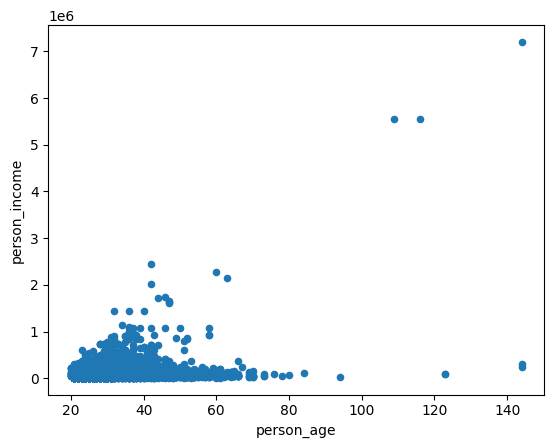

In [12]:
data.plot(kind='scatter', x='person_age', y='person_income')
pass

In [13]:
data['person_age'].quantile([0.01, .05, .1, .5, .9, .99, .995])

,person_age
0.010,21.0
0.050,22.0
0.100,22.0
0.500,26.0
0.900,35.0
0.990,48.0
0.995,53.0


In [14]:
data['person_income'].quantile([0.01, .05, .1, .5, .9, .99, .995])

,person_income
0.010,17871.450
0.050,28358.800
0.100,35106.800
0.500,67046.000
0.900,133273.300
0.990,271438.460
0.995,360802.415


Можно заметить, что есть малое количество слишком больших значений параметров `person_age` и `person_income`, такие значения будем считать выбросами и удалим строки с такими значениями.

In [12]:
rows_to_drop = data[(data['person_age'] > data['person_age'].quantile(0.995)) |
                    (data['person_income'] > data['person_income'].quantile(0.995))]
data = data.drop(rows_to_drop.index)
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44392.000000,44389.000000,44370.000000,44388.000000,44394.000000,44399.000000,44393.000000,44404.000000,44579.000000
mean,27.570463,77212.662439,5.219450,9543.685771,11.003150,0.140267,5.767553,632.348257,0.222661
std,5.473756,44318.614926,5.492311,6269.585371,2.978808,0.087034,3.674591,50.287928,0.416037
min,20.000000,8000.000000,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,47051.000000,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,66964.000000,4.000000,8000.000000,11.010000,0.120000,4.000000,639.000000,0.000000
75%,30.000000,94796.000000,8.000000,12016.750000,12.990000,0.190000,8.000000,669.000000,0.000000
max,53.000000,360790.000000,34.000000,35000.000000,20.000000,0.660000,30.000000,768.000000,1.000000


## Визуализация данных

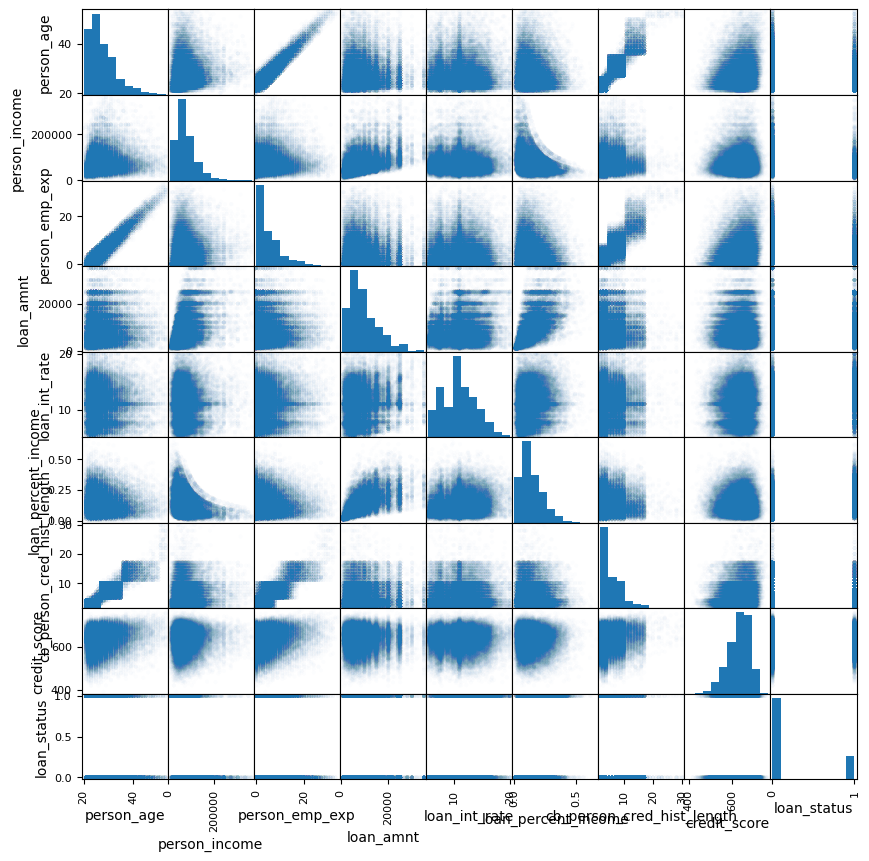

In [16]:
pd.plotting.scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

**Более четко покажем графики зависимости годового дохода от возраста и резлуьтат одобрения кредитита от годового дохода**

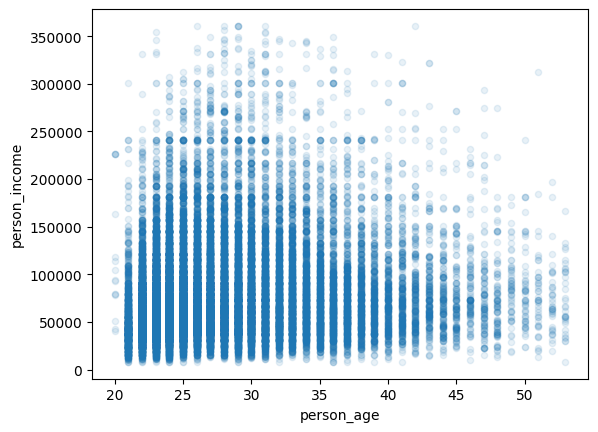

In [17]:
data.plot(kind='scatter', x='person_age', y = 'person_income', alpha=0.1)
pass

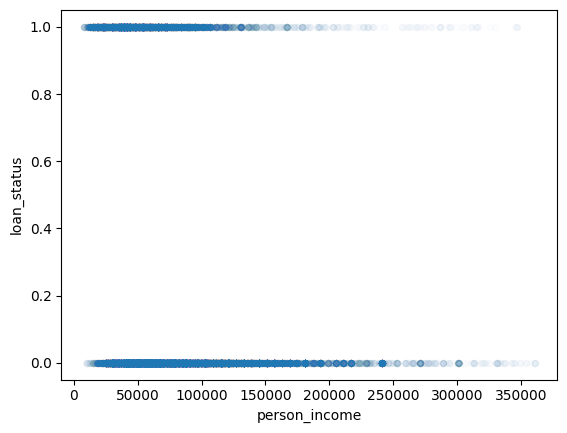

In [18]:
data.plot(kind='scatter', x='person_income', y = 'loan_status', alpha=0.01)
pass

**Также рассмотрим зависимосить одобрение кредита от кредитного рейтинга**

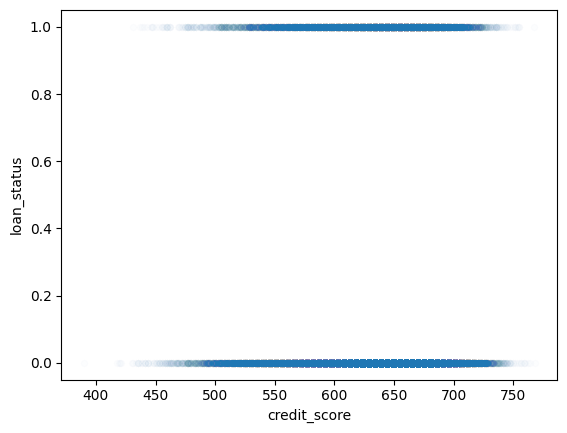

In [19]:
data.plot(kind='scatter', x='credit_score', y='loan_status', alpha=0.01)
pass

**Отобразим "ящик с усами" для процента от годового дохода и для кредитного рейтинга**

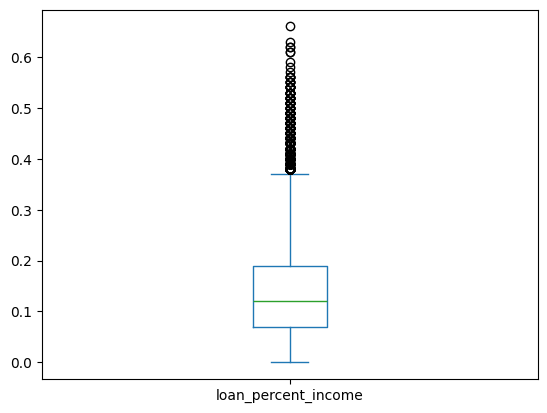

In [20]:
data['loan_percent_income'].plot(kind='box')
pass

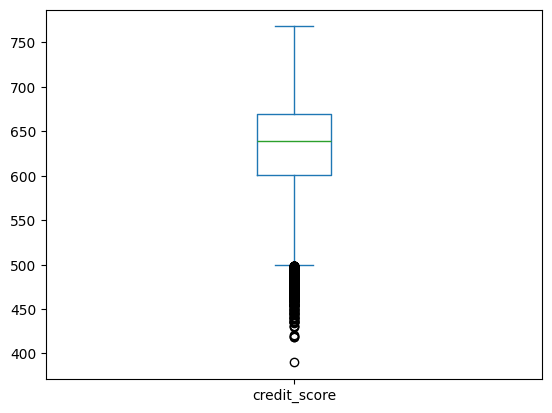

In [21]:
data['credit_score'].plot(kind='box')
pass

**Псотроим матрицу корелляций**

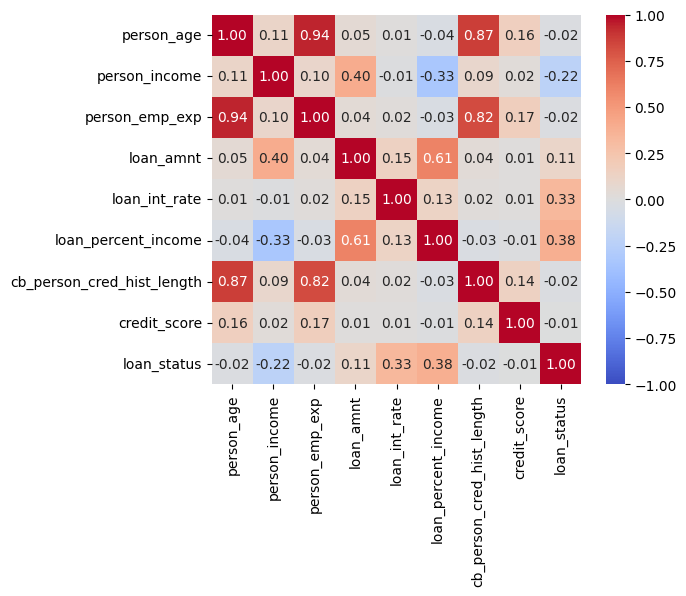

In [22]:
corr_mat = data.corr(numeric_only=True)
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f',  vmin=-1, vmax=1, cmap='coolwarm')
pass

По данной матрице видно, что на одобрение кредита больше всего влияет: процент кредита от годового дохода, процентная ставка и сумма кредита

## Разбиение на обучающую и тестовую выборку

In [13]:
X = data.drop(['loan_status'], axis=1)
y = data['loan_status']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, d = X_train.shape
N_test, d = X_test.shape

N_train, N_test, d

(33434, 11145, 13)

## Нормализация данных

**Заполним медианами пропущенные значения в столбцах, соответствующих числовым признакам**

In [15]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(X_train[['person_age', 'person_income', 'person_emp_exp',
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                     'cb_person_cred_hist_length', 'credit_score']])

SimpleImputer(strategy='median')

In [16]:
X_train[['person_age', 'person_income', 'person_emp_exp',
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                     'cb_person_cred_hist_length', 'credit_score']] = \
    imp_num.transform(X_train[['person_age', 'person_income', 'person_emp_exp',
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                     'cb_person_cred_hist_length', 'credit_score']])

**Заполним наиболее частыми значениями в столбцах категориальные пропущенные признаки**

In [17]:
imp_cat = SimpleImputer(strategy='most_frequent')
imp_cat.fit(X_train[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']])

SimpleImputer(strategy='most_frequent')

In [18]:
X_train[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']] = \
    imp_cat.transform(X_train[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']])

In [19]:
X_train.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
dtype: int64

**Бинаризация номинальных признаков**

In [20]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [21]:
dumles = pd.DataFrame(enc.transform(
                      X_train[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']]),
                      columns=enc.get_feature_names_out(), index=X_train.index)
dumles.head()

,person_gender_male,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
4794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8718,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
20925,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
39030,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [22]:
X_train = pd.concat((X_train, dumles), axis=1).drop(
    ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'], axis=1)

In [23]:
X_train.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Associate,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
4794,21.0,40299.0,0.0,5000.0,12.84,0.12,2.0,611.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8718,26.0,66951.0,4.0,8000.0,16.77,0.11,2.0,552.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
20925,29.0,54311.0,8.0,5000.0,11.01,0.09,7.0,584.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
39030,26.0,92599.0,2.0,10000.0,10.71,0.11,3.0,698.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21778,29.0,73316.0,11.0,6000.0,15.96,0.08,7.0,590.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**Стандартизация количественных признаков**

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [25]:
X_train.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_male,person_education_Associate,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
count,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,...,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04,3.343400e+04
mean,-8.330823e-17,4.484193e-17,-7.045071e-17,6.173735e-17,-3.772248e-16,1.270876e-16,4.117595e-18,7.442486e-16,-3.591605e-17,4.016647e-17,...,4.569202e-17,2.688391e-17,2.837155e-17,-2.236784e-17,-9.021517e-17,3.017798e-17,-8.288319e-18,-1.912689e-17,-2.911538e-17,8.431771e-17
std,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,...,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,-1.391651e+00,-1.559714e+00,-9.560103e-01,-1.448941e+00,-1.877105e+00,-1.615170e+00,-1.027914e+00,-4.258764e+00,-1.107568e+00,-6.011906e-01,...,-4.928049e-02,-2.647517e-01,-1.051198e+00,-4.339351e-01,-5.114344e-01,-3.435759e-01,-4.845358e-01,-4.454629e-01,-4.572254e-01,-1.020550e+00
25%,-6.546452e-01,-6.776834e-01,-7.725002e-01,-7.264893e-01,-8.119827e-01,-8.090693e-01,-7.542849e-01,-6.203659e-01,-1.107568e+00,-6.011906e-01,...,-4.928049e-02,-2.647517e-01,-1.051198e+00,-4.339351e-01,-5.114344e-01,-3.435759e-01,-4.845358e-01,-4.454629e-01,-4.572254e-01,-1.020550e+00
50%,-2.861424e-01,-2.308550e-01,-2.219697e-01,-2.448549e-01,1.139432e-03,-2.332834e-01,-4.806557e-01,1.351484e-01,9.028792e-01,-6.011906e-01,...,-4.928049e-02,-2.647517e-01,9.512953e-01,-4.339351e-01,-5.114344e-01,-3.435759e-01,-4.845358e-01,-4.454629e-01,-4.572254e-01,9.798641e-01
75%,4.508631e-01,3.938447e-01,5.120710e-01,3.973242e-01,6.664212e-01,5.728169e-01,6.138611e-01,7.316071e-01,9.028792e-01,1.663366e+00,...,-4.928049e-02,-2.647517e-01,9.512953e-01,-4.339351e-01,-5.114344e-01,-3.435759e-01,-4.845358e-01,-4.454629e-01,-4.572254e-01,9.798641e-01
max,4.688645e+00,6.392748e+00,5.283335e+00,4.089854e+00,3.021787e+00,5.985205e+00,6.633704e+00,2.699921e+00,9.028792e-01,1.663366e+00,...,2.029200e+01,3.777124e+00,9.512953e-01,2.304492e+00,1.955285e+00,2.910565e+00,2.063831e+00,2.244856e+00,2.187105e+00,9.798641e-01


**Выполняем все шаги нормализации для тестовой выборки**

In [26]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(X_test[['person_age', 'person_income', 'person_emp_exp',
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                     'cb_person_cred_hist_length', 'credit_score']])
X_test[['person_age', 'person_income', 'person_emp_exp',
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                     'cb_person_cred_hist_length', 'credit_score']] = \
    imp_num.transform(X_test[['person_age', 'person_income', 'person_emp_exp',
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                     'cb_person_cred_hist_length', 'credit_score']])

imp_cat = SimpleImputer(strategy='most_frequent')
imp_cat.fit(X_test[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']])
X_test[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']] = \
    imp_cat.transform(X_test[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']])

enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_test[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']])

dumles = pd.DataFrame(enc.transform(
                      X_test[['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']]),
                      columns=enc.get_feature_names_out(), index=X_test.index)
X_test = pd.concat((X_test, dumles), axis=1).drop(
    ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'], axis=1)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)


## Алгоритм kNN

**Запустим алгоритм k ближайших соседей с k=10**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [38]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test != y_test_predict)

In [39]:
print(err_train, err_test)

0.08847281210743554 0.1117092866756393


**Теперь подберем k, чтобы получить более точный результат**

In [40]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 10, 15, 20]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.10588070910150038 15


In [41]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.0911945923311599 0.10964558097801705


**Вывод**

При использовании алгоритма `kNN` получилось добиться минимальной ошибки, равной `10,96%` при `k=15`

## Задача кластеризации

**Объединим тестовые и обучающие данные, чтобы использовать все доступные данные**

In [27]:
X = pd.concat([X_train, X_test], ignore_index=True)
Y = pd.concat([y_train, y_test], ignore_index=True)
X.shape

(44579, 25)

**Запустим алгоритм kMeans и сравним результат его работы с истинными метками**

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
ars = adjusted_rand_score(labels, Y)
nmis = normalized_mutual_info_score(labels, Y)
print(f'ARS: {ars}')
print(f'NMIS: {nmis}')

ARS: -0.020950577862671585
NMIS: 0.003702962562149516


Значения ARS и MNIS, близкие к нулю, показывают, что алгоритм kMeans не может точно разделить данные на истинные классы

**Теперь протестируем алгоритм DBSCAN**

In [29]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=5, min_samples=20)
labels = dbscan.fit_predict(X)
ars = adjusted_rand_score(labels, Y)
nmis = normalized_mutual_info_score(labels, Y)
print(f'ARS: {ars}')
print(f'NMIS: {nmis}')

ARS: 0.002469646032909542
NMIS: 0.00036263331605395016


Результаты DBSCAN почти не отличаются от результатов kMeans

**И в завершении проверим AgglomerativeClustering**

In [31]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
labels = agg_clustering.fit_predict(X)
ars = adjusted_rand_score(labels, Y)
nmis = normalized_mutual_info_score(labels, Y)
print(f'ARS: {ars}')
print(f'NMIS: {nmis}')

ARS: 0.001940863028942093
NMIS: 0.0003478099610219441


Результаты AgglomerativeClustering оказались такими же, как и в предыдущих алгоритмах

**Вывод**

Алгоритмы кластеризации не смогли показать эффективного разбиения на кластеры, которые были бы близки к истинным меткам. Такое могло произойти из-за того, что данные не подходят для задачи кластеризации. По графикам видно, что точки лежат достаточно плотно друг к другу и нет явного разделения данных на кластеры. Также могло оказать влияние несбалансированность данных. Почти 80% относятся к одному классу, что также могло оказать отрицательное влияние на эффективность алгоритмов кластеризации.  

## Вывод

Благодаря данной работе были получены первичные навки в машинном обучении и анализе данных.

Были выполнены следующие задачи:
* Словесное описание поставленной задачи
* Анализ данных с помощью численных значений и графиков
* Нахождение выбросов в задаче
* Подготовка данных для использования методов машинного обучения
* Использование алгоритма `kNN` для решения задачи
* Использование алгоритмов кластеризации (`kMeans`, `DBSCAN`, `AgglomerativeClustering`) для решения задачи кластеризации